# House Price Prediction 

## Advanced Regression

### Submitted By :- Aarushi Gupta

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

## Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
# command to display all the rows and columns in pandas dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Reading the Dataset

In [3]:
# Loading the dataset
house_data = pd.read_csv('train.csv')
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# checking shape of the dataset
house_data.shape

(1460, 81)

In [5]:
#checking data types of each column of dataset
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Checking for Null values

In [6]:
# checking for null values
print(house_data.isna().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# percentage of null values present in the data
round(house_data.isnull().sum()/house_data.shape[0]*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
# making first checkpoint
df = house_data.copy()

In [9]:
# dropping the Id column since it has all unique values
df.drop(['Id'], axis=1, inplace=True)

## Outlier Treatment

In [10]:
# Printing the nice descriptive summary for the dataset
df.describe(percentiles=[0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


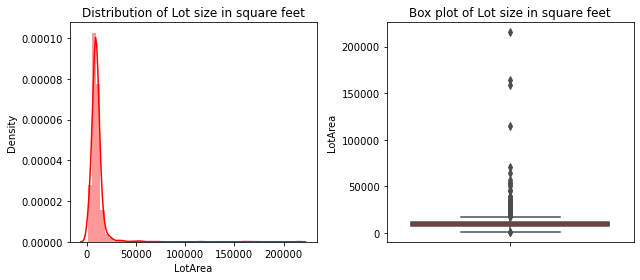

In [11]:
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
# this shows exponential variation instead of normal distribution

fig, axes = plt.subplots(1,2,figsize=(9,4))
# Distribution of Lot Area data
sns.distplot(df['LotArea'],color='r',ax=axes[0])
sns.boxplot(y=df['LotArea'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Lot size in square feet')
axes[1].set_title('Box plot of Lot size in square feet')
plt.tight_layout()
plt.show()

In [12]:
# making second checkpoint
data = df.copy()

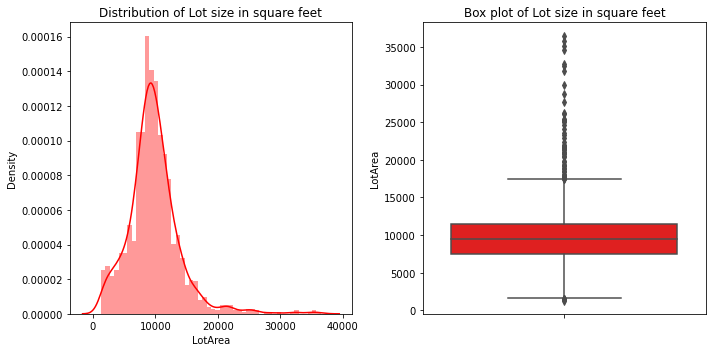

In [13]:
# declare a variable that will be 99th percentile of the 'LotArea' variable
max_threshold=data['LotArea'].quantile(0.99)
data=data[data['LotArea']<max_threshold]

fig, axes = plt.subplots(1,2,figsize=(10,5))

# Distribution of LotArea data after outlier treatment
sns.distplot(data['LotArea'],color='r',ax=axes[0])
sns.boxplot(y=data['LotArea'],color='r',ax=axes[1])
axes[0].set_title('Distribution of Lot size in square feet')
axes[1].set_title('Box plot of Lot size in square feet')
plt.tight_layout()
plt.show()

In [14]:
print('Data Shape without Outlier Treatment =', df.shape)
print('Data Shape after Outlier Treatment =',data.shape)

Data Shape without Outlier Treatment = (1460, 80)
Data Shape after Outlier Treatment = (1445, 80)


In [15]:
# again printing descriptive summary of the data without outliers
data.describe(percentiles=[0.25,0.50,0.75,0.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1445.000000,1192.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1437.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1364.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,56.982699,69.765101,9776.588927,6.089965,5.573702,1971.258131,1984.804152,102.323591,434.247059,45.271972,569.089965,1048.608997,1154.901038,345.313495,5.905190,1506.119723,0.417993,0.057439,1.561938,0.382699,2.866436,1.047059,6.504498,0.601384,1978.562317,1.761938,471.042215,92.069896,46.113495,22.147405,3.444983,14.950865,2.455363,43.110035,6.317647,2007.815225,179844.114879
std,42.295987,23.138183,4238.856255,1.376068,1.113814,30.244144,20.662999,178.847900,429.520738,158.339134,442.563776,413.475723,370.642837,434.607926,48.871305,506.080014,0.512673,0.238637,0.546778,0.503015,0.811629,0.221428,1.609619,0.635077,24.678530,0.748085,212.388078,121.516884,65.313305,61.392992,29.467138,55.633605,38.380858,498.231790,2.701851,1.329316,78495.845933
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7500.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,224.000000,794.000000,880.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9430.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,379.000000,0.000000,481.000000,990.000000,1082.000000,0.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162000.000000
75%,70.000000,80.000000,11475.000000,7.000000,6.000000,2000.000000,2004.000000,164.000000,704.000000,0.000000,808.000000,1281.000000,1382.000000,728.000000,0.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
99%,190.000000,138.180000,25201.960000,10.000000,9.000000,2009.000000,2009.000000,782.240000,1555.120000,808.920000,1797.800000,2129.400000,2202.160000,1382.320000,360.000000,3036.240000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,989.720000,481.600000,278.480000,261.800000,168.000000,268.800000,0.000000,700.000000,12.000000,2010.000000,439463.200000
max,190.000000,313.000000,36500.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,2336.000000,3206.000000,3228.000000,2065.000000,572.000000,4476.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Dealing with Missing Values

In [16]:
# checking the columns that have null values present
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.58
MiscFeature,96.40
Alley,93.70
Fence,80.55
FireplaceQu,47.75
LotFrontage,17.51
GarageYrBlt,5.61
GarageCond,5.61
GarageType,5.61


In [17]:
# data with NA does not have any pool according to the data dictionary
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
# Replacing Miscellaneous feature not covered in other categories NA for None
data['MiscFeature'] = data['MiscFeature'].fillna('None')
# Alley access to the property NA as No alley
data['Alley'] = data['Alley'].fillna('No alley access')
# NA means No fence for the property
data['Fence'] = data['Fence'].fillna('No Fence')
# NA means No Fireplace for the property
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')

In [18]:
print("Median = ",data['LotFrontage'].median())
print("Mean = ",data['LotFrontage'].mean())

Median =  69.0
Mean =  69.76510067114094


In [19]:
# Linear feet of street connected to property NA filled with Median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [20]:
# Replacing NA for Garage Variable with No Garage according to Data Dictionary
data['GarageType'] = data['GarageType'].fillna('No Garage')

data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')

data['GarageQual'] = data['GarageQual'].fillna('No Garage')

data['GarageCond'] = data['GarageCond'].fillna('No Garage')

data['GarageYrBlt'] = data['GarageYrBlt'].fillna('No Garage')

In [21]:
# Replacing the Null variables with Basement Variable for No Basement
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')

data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')

data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')

data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')

data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')

In [22]:
print("Median = ",data['MasVnrArea'].median())
print("Mean = ",data['MasVnrArea'].mean())

Median =  0.0
Mean =  102.32359081419624


In [23]:
# Replacing NA for  Masonry veneer area in square feet with the median value
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].median())
# Replacing NA Masonry veneer type for None Type
data['MasVnrType'] = data['MasVnrType'].fillna('None')

In [24]:
# Replacing NA for Electrical system with the mode value
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [25]:
# checking the columns that have null values present after missing value treatment
null = pd.DataFrame(round(data.isnull().sum()/len(data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
# dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,


## Feature Engineering- Creating New Feature

In [26]:
# Making another check point
house = data.copy()

In [27]:
# calculating age of property by subracting when the property was sold to when the property to build the house  
house['PropAge'] = house['YrSold'] - house['YearBuilt']
# Dropping the Dates Columns 
house.drop(columns = ['YearBuilt','YearRemodAdd','YrSold','MoSold'], axis=1, inplace=True)

In [28]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1445 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1445 non-null   int64  
 1   MSZoning       1445 non-null   object 
 2   LotFrontage    1445 non-null   float64
 3   LotArea        1445 non-null   int64  
 4   Street         1445 non-null   object 
 5   Alley          1445 non-null   object 
 6   LotShape       1445 non-null   object 
 7   LandContour    1445 non-null   object 
 8   Utilities      1445 non-null   object 
 9   LotConfig      1445 non-null   object 
 10  LandSlope      1445 non-null   object 
 11  Neighborhood   1445 non-null   object 
 12  Condition1     1445 non-null   object 
 13  Condition2     1445 non-null   object 
 14  BldgType       1445 non-null   object 
 15  HouseStyle     1445 non-null   object 
 16  OverallQual    1445 non-null   int64  
 17  OverallCond    1445 non-null   int64  
 18  RoofStyl

In [29]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,PropAge
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,WD,Normal,223500,7
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,WD,Abnorml,140000,91
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,WD,Normal,250000,8


## Exploratory Data Analysis

In [30]:
# Making  a variable for columns with numeric values
numeric_cols = list(house.select_dtypes(include=['int64','float64']).columns)

In [31]:
# scatter plots for various numeric features
cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF',\
        '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'PropAge']

<Figure size 144x216 with 0 Axes>

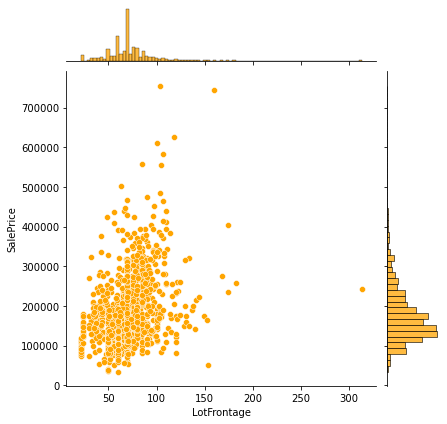

<Figure size 144x216 with 0 Axes>

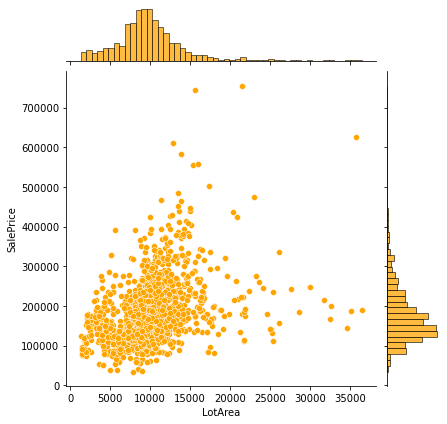

<Figure size 144x216 with 0 Axes>

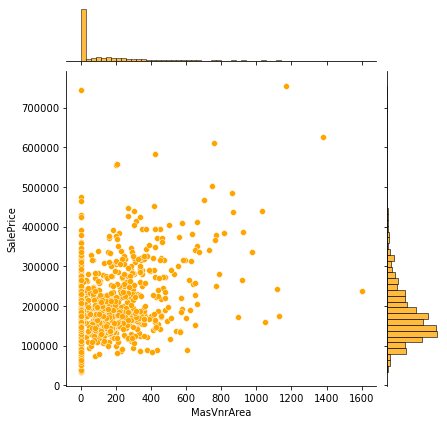

<Figure size 144x216 with 0 Axes>

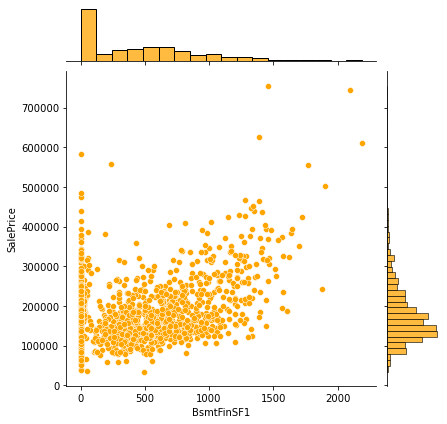

<Figure size 144x216 with 0 Axes>

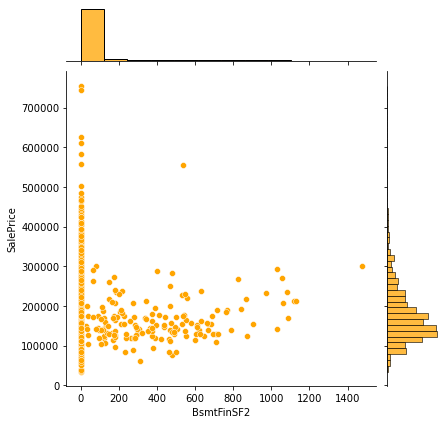

<Figure size 144x216 with 0 Axes>

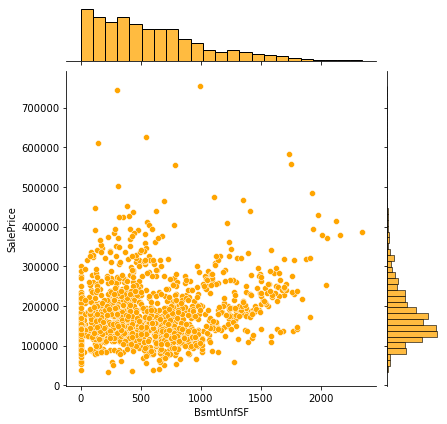

<Figure size 144x216 with 0 Axes>

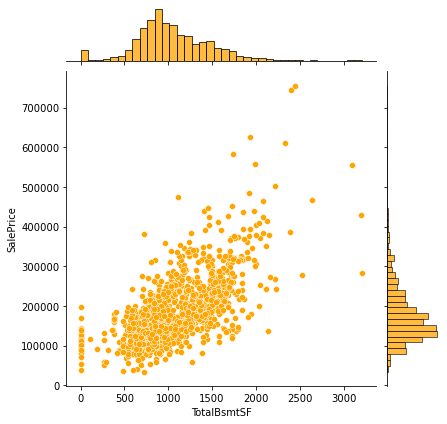

<Figure size 144x216 with 0 Axes>

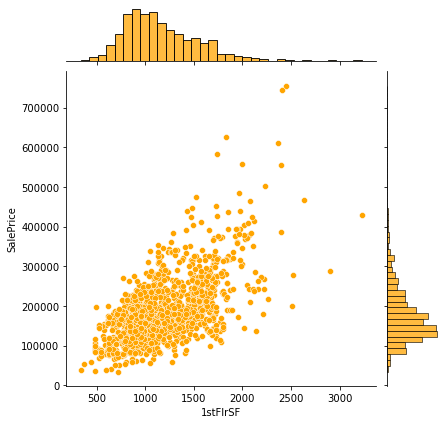

<Figure size 144x216 with 0 Axes>

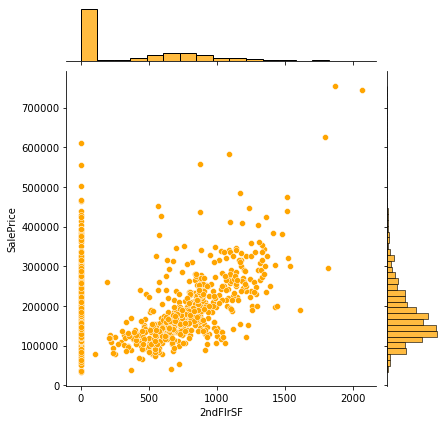

<Figure size 144x216 with 0 Axes>

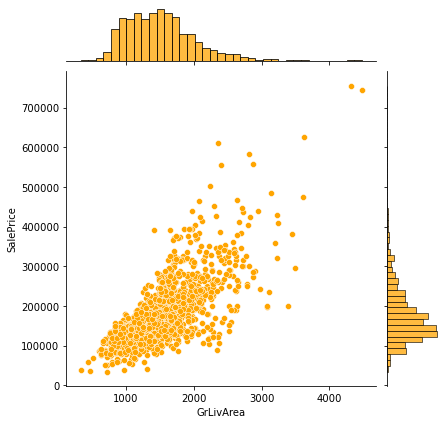

<Figure size 144x216 with 0 Axes>

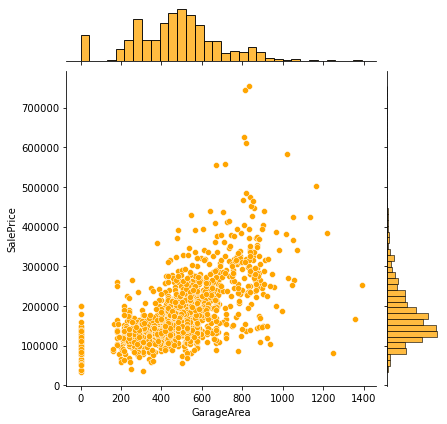

<Figure size 144x216 with 0 Axes>

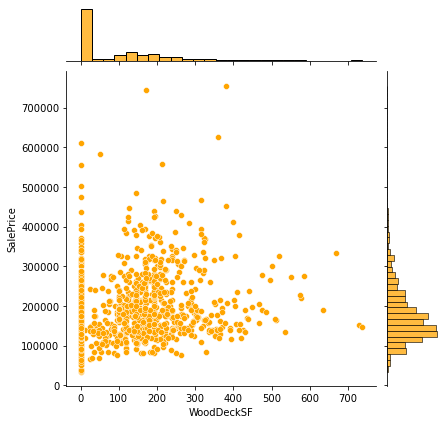

<Figure size 144x216 with 0 Axes>

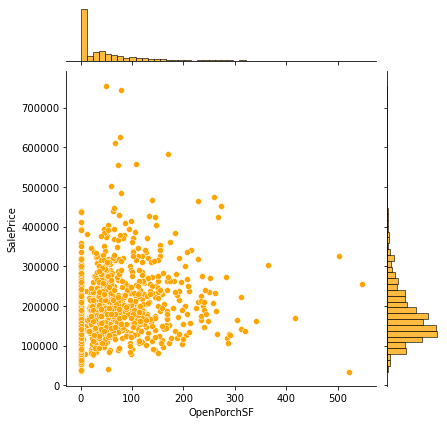

<Figure size 144x216 with 0 Axes>

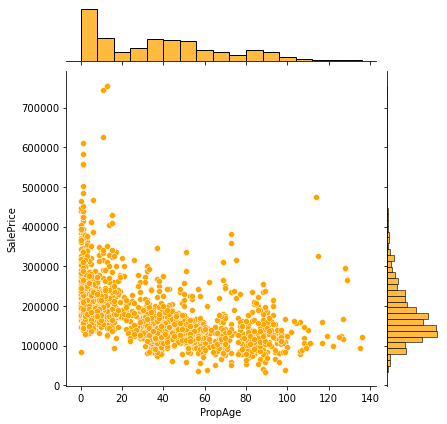

In [32]:
for i in cols:
    plt.figure(figsize=[2,3])
    sns.jointplot(x=i, y='SalePrice', data=house, color= 'orange')
    plt.show()

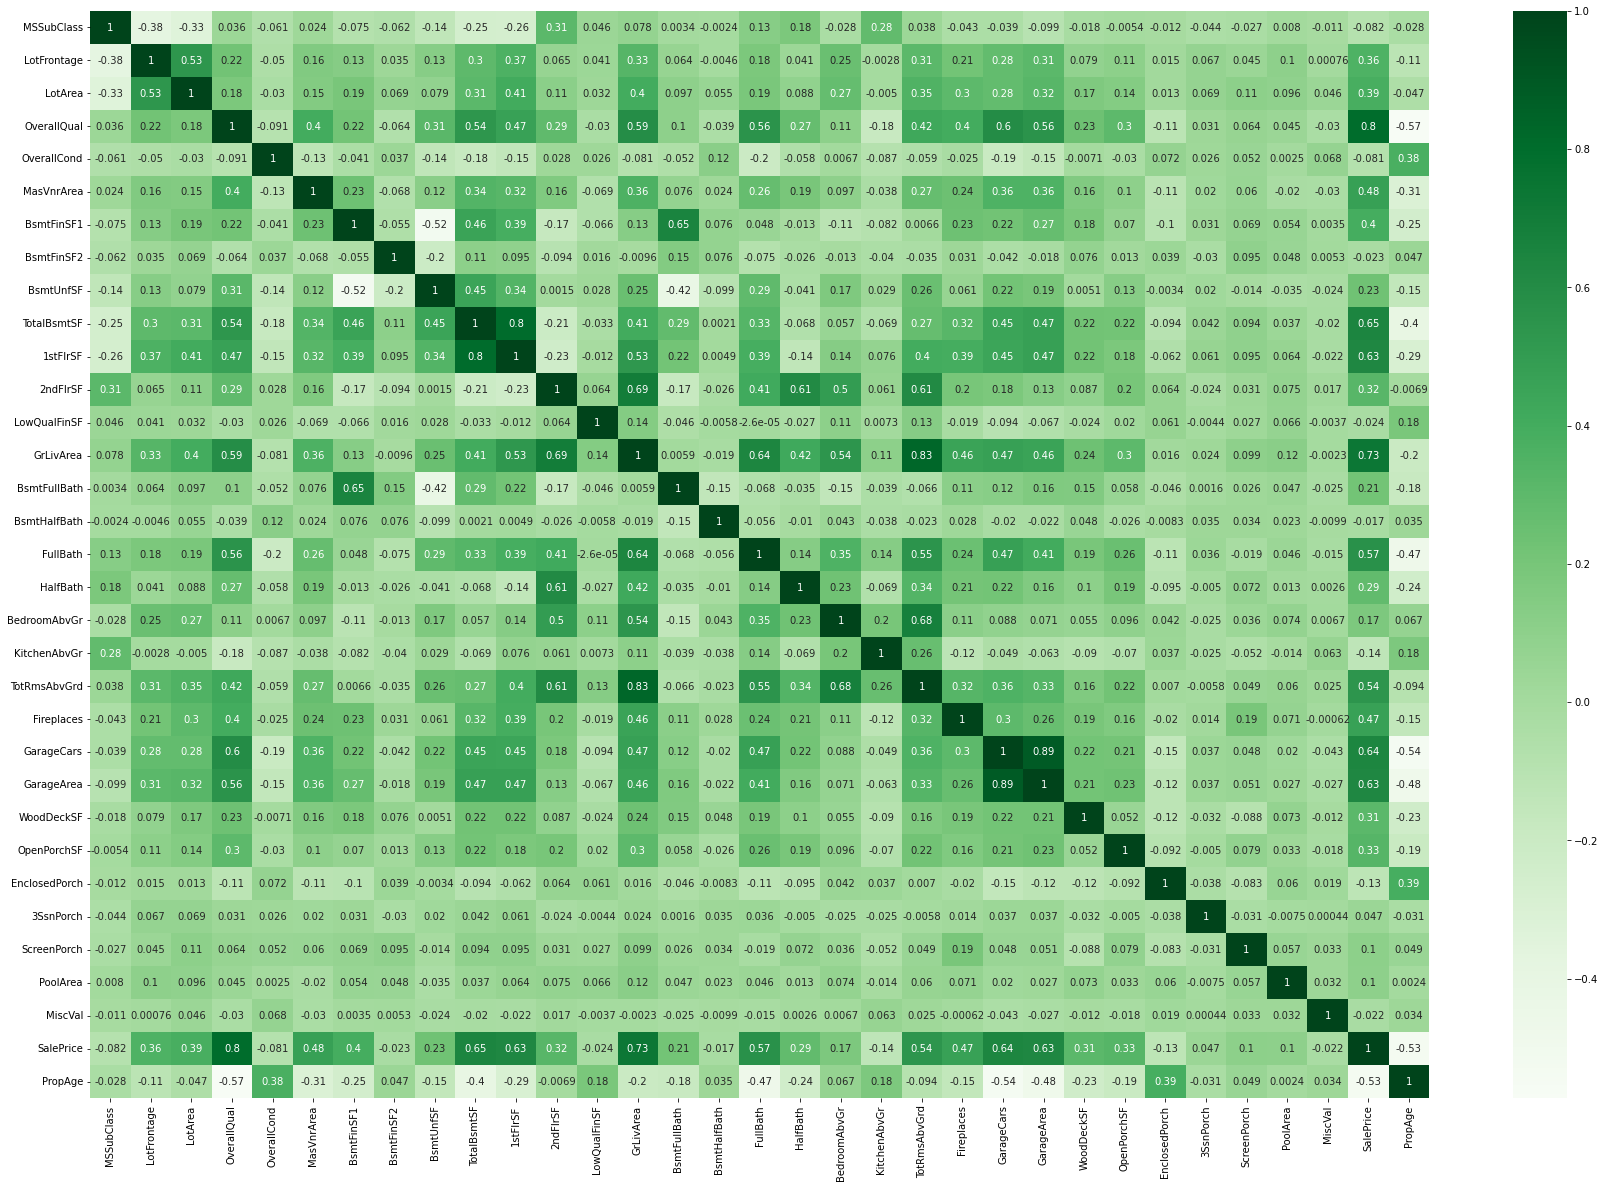

In [33]:
# correlation matrix for getting an idea about the correlations between various variables present.
plt.figure(figsize=[30,20])
sns.heatmap(house.corr(), cmap="Greens", annot=True)
plt.show()

In [34]:
# no significant variance in street and Alley , thus dropping those columns
house.drop(['Street','Alley'],axis=1, inplace=True)

## Dealing with Categorical Variables and Dummy Variables

In [35]:
# mapping the ordinal variable columns to the labels. 
house['LotShape'] = house.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
house['LandSlope'] = house.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house['ExterCond'] = house.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['ExterQual'] = house.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['BsmtCond'] = house.BsmtCond.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtQual'] = house.BsmtQual.map({'No Basement':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['BsmtExposure'] = house.BsmtExposure.map({'No Basement':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house['BsmtFinType1'] = house.BsmtFinType1.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['BsmtFinType2'] = house.BsmtFinType2.map({'No Basement':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house['HeatingQC'] = house.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['CentralAir'] = house.CentralAir.map({'N':0,'Y':1})
house['KitchenQual'] = house.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house['GarageFinish'] = house.GarageFinish.map({'No Garage':0,'Unf':1,'RFn':2,'Fin':3})
house['GarageQual'] = house.GarageQual.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house['GarageCond'] = house.GarageCond.map({'No Garage':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [36]:
# Changing the 'No Garage' year as O since the property does not have Garage in it
house['GarageYrBlt'] = house['GarageYrBlt'].apply(lambda x: 0 if(x=='No Garage') else x)
house['GarageYrBlt']=house['GarageYrBlt'].astype(int)

In [37]:
# At last creating the dummy variables for all the categorical varibles expect for ordinal ones
data_cleaned = pd.get_dummies(house,drop_first=True)

In [38]:
# Printing first 5 rows for the cleaned dataset
data_cleaned.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,3,0,7,5,196.0,3,2,4,3,1,6,706,1,0,150,856,4,1,856,854,0,1710,1,0,2,1,3,1,3,8,0,2003,2,2,548,3,3,0,61,0,0,0,0,0,208500,5,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,3,0,6,8,0.0,2,2,4,3,4,5,978,1,0,284,1262,4,1,1262,0,0,1262,0,1,2,0,3,1,2,6,1,1976,2,2,460,3,3,298,0,0,0,0,0,0,181500,31,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,

In [39]:
# checking for shape for the cleaned dataset
data_cleaned.shape

(1445, 210)

# Model Building

In [40]:
# Declaring independent and dependent variable
X = data_cleaned.drop(['SalePrice'], axis=1)
y = data_cleaned['SalePrice']

In [41]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
# using 70% as training data and 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [42]:
X_train.shape, X_test.shape

((1011, 209), (434, 209))

## Scaling the Data

In [43]:
# specifying the numeric columns to be scaled
Cols_to_scale = list(X_train.select_dtypes(include=['int64','int32','float64','float32']).columns)

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()

X_train[Cols_to_scale] = scaler.fit_transform(X_train[Cols_to_scale])
X_test[Cols_to_scale] = scaler.transform(X_test[Cols_to_scale])

In [45]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
522,0.176471,0.099315,0.105114,1.0,0.0,0.500,0.714286,0.0000,0.333333,0.75,0.6,0.75,0.25,0.833333,0.182358,0.166667,0.0,0.281003,0.313163,1.00,1.0,0.190684,0.319613,0.0,0.296296,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,0.363636,0.666667,0.970149,0.333333,0.50,0.302158,0.6,0.6,0.000000,0.043876,0.065217,0.0,0.0,0.0,0.000000,0.433824,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
794,0.235294,0.164384,0.2707

## Linear Regression

In [46]:
# Create instance of the class Linear Regression
linear_reg = LinearRegression()
# Fit a line
linear_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
# running RFE for top 100 variables
rfe = RFE(linear_reg, n_features_to_select=150)            
rfe = rfe.fit(X_train, y_train)  

In [48]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))[:10]

[('MSSubClass', False, 39),
 ('LotFrontage', False, 49),
 ('LotArea', True, 1),
 ('LotShape', False, 35),
 ('LandSlope', False, 18),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', True, 1)]

In [49]:
col = X_train.columns[rfe.support_]

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,PropAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Low,Utilities_NoSeWa,LotConfig_FR2,LotConfig_FR3,Neighborhood_Blueste,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseP,Electrical_Mix,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,PavedDrive_P,PoolQC_Gd,PoolQC_No Pool,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_New,SaleCondition_AdjLand,SaleCondition_Normal,SaleCondition_Partial
522,0.105114,0.500,0.714286,0.0000,0.333333,0.75,0.6,0.75,0.25,0.182358,0.166667,0.0,0.281003,0.313163,0.190684,0.319613,0.0,0.296296,0.0,0.375,0.0,0.333333,0.363636,0.666667,0.970149,0.50,0.302158,0.6,0.6,0.000000,0.043876,0.065217,0.0,0.0,0.0,0.000000,0.433824,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
794,0.270795,0.625,0.428571,0.0000,0.666667,0.50,0.8,0.75,0.25,0.000000,0.166667,0.0,0.330701,0.222084,0.220524,0.391768,0.0,0.354104,0.0,0.375,0.0,0.666667,0.363636,0.333333,0.992040,0.50,0.294245,0.6,0.6,0.194293,0.084095,0.000000,0.0,0.0,0.0,0.060241,0.102941,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41,0.443324,0.375,0.571429,0.0000,0.333333,0.75,0.6,0.75,1.00,0.441956,0.166667,0.0,0.177891,0.421085,0.308588,0.000000,0.0,0.212212,0.5,0.250,0.0,0.333333,0.181818,0.666667,0.974627,0.25,0.221583,0.6,0.6,0.000000,0.190128,0.000000,0.0,0.0,0.0,0.000000,0.352941,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0
786,0.269886,0.375,0.571429,0.0000,0.333333,0.75,0.4,0.75,0.25,0.313528,0.166667,0.0,0.000000,0.213974,0.176856,0.332203,0.0,0.293293,0.0,0.500,0.0,0.333333,0.

In [52]:
X_train_rfe.shape

(1011, 150)

In [53]:
# Associate the new 50 columns to X_train and X_test for further analysis
X_test1 =  X_test[col]

In [54]:
linear_reg.fit(X_train_rfe, y_train)

LinearRegression()

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = linear_reg.predict(X_train_rfe)
y_pred_test = linear_reg.predict(X_test1)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared for training data = ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared for test data = ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of squared for training data = ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of squared for test data = ',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for training data = ',mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data = ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

R-squared for training data =  0.9280319620923198
R-squared for test data =  -1.0326428103326915e+22
Residual Sum of squared for training data =  451548443554.0
Residual Sum of squared for test data =  2.707770506855367e+34
Mean squared error for training data =  446635453.5647873
Mean squared error for test data =  6.2391025503579885e+31


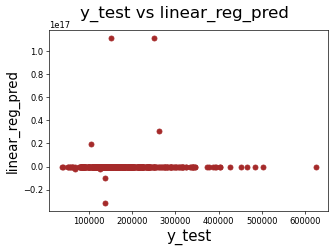

In [56]:
# model evaluation
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=60)
plt.scatter(y_test,y_pred_test, color='brown')
fig.suptitle('y_test vs linear_reg_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('linear_reg_pred', fontsize=16)  
plt.show()

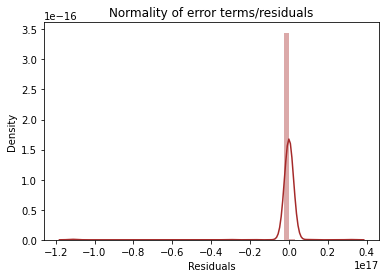

In [57]:
y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True, color='brown')
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

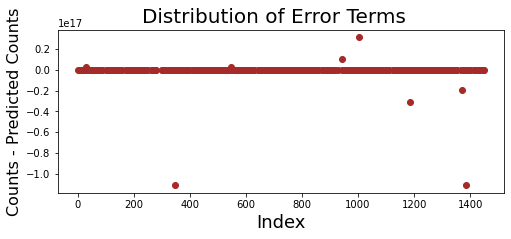

In [58]:
fig = plt.figure(figsize=(8,3))
plt.plot(y_res, color="brown", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Distribution of Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plt.show()

## Ridge Regression

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]}
# making an instance for the class Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
# fitting the training data
model_cv.fit(X_train_rfe, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [60]:
# creating a dataframe to show results of the above model
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004801,0.000741,0.002199,0.000400,0.0001,{'alpha': 0.0001},-18402.331555,-15567.494243,-21041.330067,-20270.968392,-17524.963878,-18561.417627,1956.305268,24,-13550.670531,-14422.178053,-13001.025562,-13047.456462,-13352.739142,-13474.813950,514.832999
1,0.004603,0.000792,0.002200,0.000397,0.001,{'alpha': 0.001},-18388.664649,-15792.651264,-20484.474031,-20262.146404,-17645.786510,-18514.744571,1738.621497,23,-13552.737691,-14667.062260,-13228.649309,-13049.028933,-13579.900084,-13615.475655,562.411339
2,0.004008,0.000004,0.002394,0.000493,0.01,{'alpha': 0.01},-18321.036435,-16091.645103,-20016.820060,-20195.488308,-17936.276841,-18512.253349,1504.968972,22,-13572.565628,-14997.945467,-13553.287711,-13068.367282,-13908.185010,-13820.070220,646.937872
3,0.004399,0.000486,0.002002,0.000635,0.05,{'alpha': 0.05},-18191.290841,-15989.313714,-19761.880150,-19989.777138,-18023.261956,-18391.104760,1440.736805,20,-13646.919075,-15089.270796,-13639.921871,-13128.706337,-14011.831444,-13903.329905,656.262198
4,0.004404,0.000493,0.002201,0.000400,0.1,{'alpha': 0.1},-18064.638223,-15834.651645,-19573.577221,-19768.761302,-18030.361209,-18254.397920,1412.437872,19,-13716.567575,-15120.180125,-13685.789610,-13179.469023,-14054.949718,-13951.391210,647.818201


In [61]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 4.0}
-17052.316884028427


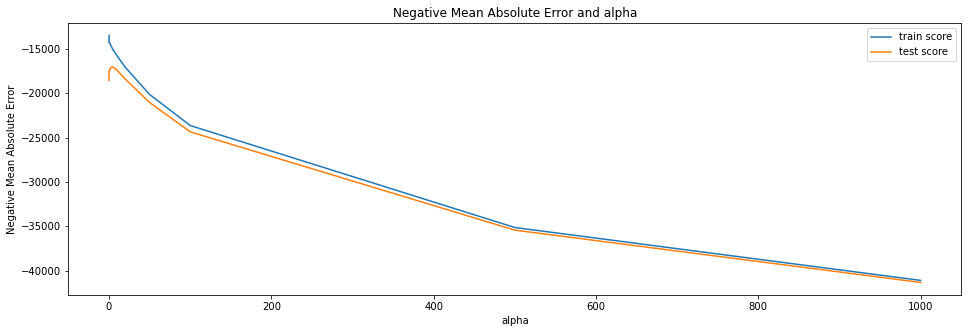

In [62]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
#Fitting Ridge model for alpha = 7 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)

Ridge(alpha=4)

In [64]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test1)

metric1 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared for training data = ', r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared for test data = ', r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of squared for training data = ', rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of squared for test data = ',rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for training data = ',mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data = ', mse_test_lr)
metric1.append(mse_test_lr**0.5)

R-squared for training data =  0.9173635703094425
R-squared for test data =  0.9008203922508515
Residual Sum of squared for training data =  518485042700.4448
Residual Sum of squared for test data =  260066321149.42682
Mean squared error for training data =  512843761.3258604
Mean squared error for test data =  599231154.7221816


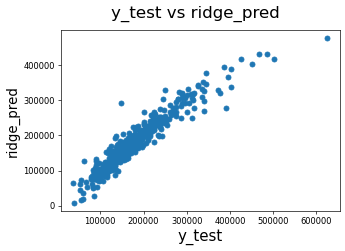

In [65]:
# model evaluation

# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=60)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

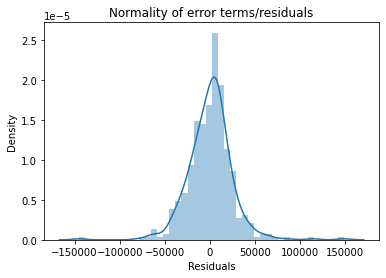

In [66]:
# Distribution of errors should be normal for regression.
y_res=y_test-y_pred_test
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

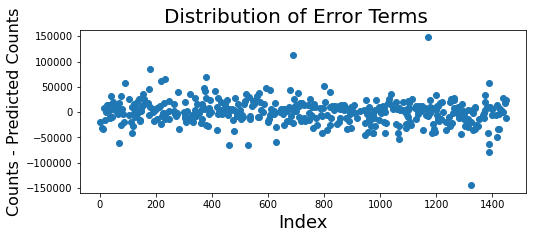

In [67]:
# Spread of residual terms can account for homoscedasticity as well
fig = plt.figure(figsize=(8,3))
plt.plot(y_res, marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Distribution of Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plt.show()

## Lasso Regression

In [68]:
# making an instance for the class Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# fitting the training data to the model
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [69]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.071213,0.003651,0.002003,0.000632,0.0001,{'alpha': 0.0001},-18342.817587,-15816.066505,-20436.005378,-20327.085964,-17642.897682,-18512.974623,1734.839932,26,-13556.756477,-14662.506441,-13121.593346,-13052.711690,-13574.404425,-13593.594476,576.131468
1,0.070452,0.004892,0.001858,0.000437,0.001,{'alpha': 0.001},-18342.822211,-15816.029930,-20435.867085,-20326.749852,-17642.888683,-18512.871552,1734.751164,25,-13556.756520,-14662.566719,-13121.651615,-13052.709676,-13574.457963,-13593.628499,576.144308
2,0.070014,0.004522,0.002003,0.000006,0.01,{'alpha': 0.01},-18342.868442,-15815.664182,-20434.482264,-20323.388728,-17642.798131,-18511.840349,1733.863390,24,-13556.820843,-14663.242958,-13122.263789,-13052.846553,-13575.051058,-13594.045040,576.264514
3,0.070214,0.004622,0.001600,0.000487,0.05,{'alpha': 0.05},-18343.073892,-15814.038465,-20427.927733,-20308.450397,-17642.393930,-18507.176883,1729.834905,23,-13557.378970,-14666.510550,-13125.182613,-13053.505287,-13577.759316,-13596.067347,576.851220
4,0.070831,0.004406,0.001800,0.000396,0.1,{'alpha': 0.1},-18343.330675,-15812.005923,-20419.834767,-20289.777485,-17641.885245,-18501.366819,1724.834949,22,-13558.171530,-14670.659953,-13128.921316,-13054.357708,-13581.373728,-13598.696847,577.588338


In [70]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-17299.46503480588


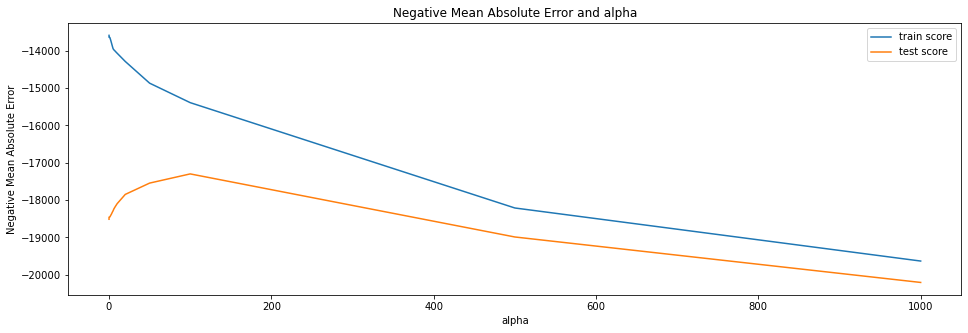

In [71]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=100)

In [73]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test1)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-squared for training data = ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-squared for test data = ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of squared for training data = ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of squared for test data = ',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean squared error for training data = ',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean squared error for test data = ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

R-squared for training data =  0.9124644973730598
R-squared for test data =  0.9036438878959084
Residual Sum of squared for training data =  549223254045.3042
Residual Sum of squared for test data =  252662620511.2007
Mean squared error for training data =  543247531.2020813
Mean squared error for test data =  582171936.6617528


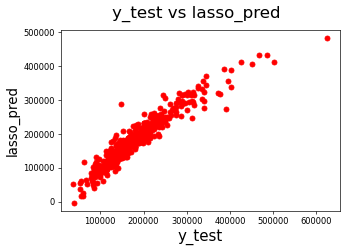

In [74]:
# model evaluation
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=60)
plt.scatter(y_test,y_pred_test, color='red')
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

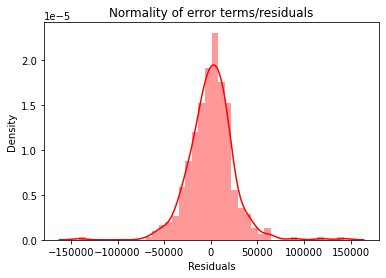

In [75]:
y_res=y_test-y_pred_test
# Distribution of errors
sns.distplot(y_res,kde=True, color='red')
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

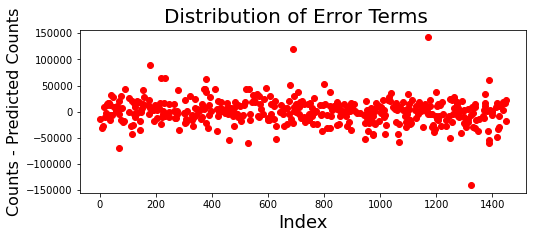

In [76]:
fig = plt.figure(figsize=(8,3))
plt.plot(y_res, color="red", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Distribution of Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label
plt.show()

## Model Results

In [77]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric3
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.280320e-01,9.173636e-01,9.124645e-01
1,R2 Score (Test),-1.032643e+22,9.008204e-01,9.036439e-01
2,RSS (Train),4.515484e+11,5.184850e+11,5.492233e+11
3,RSS (Test),2.707771e+34,2.600663e+11,2.526626e+11
4,MSE (Train),2.113375e+04,2.264605e+04,2.330767e+04
5,MSE (Test),7.898799e+15,2.447920e+04,2.412824e+04


In [78]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [79]:
betas['Linear'] = linear_reg.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [80]:
betas.sort_values(by=['Lasso'], ascending=False).head(10)

,Linear,Ridge,Lasso
GrLivArea,1.273635e+18,76427.348443,241178.307476
OverallQual,6.715052e+04,63350.465487,75207.918413
RoofMatl_WdShngl,7.519592e+04,42974.921915,55939.410337
BsmtFinSF1,-2.996471e+17,52348.887765,49841.862582
PoolArea,4.355622e+06,24796.343973,35925.864604
TotalBsmtSF,4.390624e+17,41418.994872,34450.803512
MasVnrArea,5.692718e+04,31504.257709,31569.819626
Neighborhood_NridgHt,2.382080e+04,23673.458368,29414.134721
OverallCond,3.457230e+04,27132.212247,28320.031398
SaleType_New,2.762793e+04,19484.572837,27595.609745


In [81]:
betas[['Lasso']].sort_values(by='Lasso', ascending=False).head()

,Lasso
GrLivArea,241178.307476
OverallQual,75207.918413
RoofMatl_WdShngl,55939.410337
BsmtFinSF1,49841.862582
PoolArea,35925.864604


## Conclusions

- As can be seen from the above table, Linear Regression performs good on training data but performs poorly on unseen data (test data). The assumptions of linear regression on error terms are also not followed for this dataset. Thus, it is clear that we need regularization techniques.


- Ridge Regression gives fairly good results on both training and test data with R-squared value of 91.7% on training data and 90% on test data. There is no pattern seen on the error terms and also residuals follow the normal distribution.


- Lasso Regression also performs well on both the training and test data with R-squared value of 91.2% on training data and 90.3% on test data. Here also, there is no pattern seen on the residual terms and also the error terms are normally distributed.


The important features obtained from the above models (Lasso and Ridge Regression) are

Since higher values of positive coefficients suggest a higher Sales Price. Thus, some of the features which increase the prices are:
- GrLivArea: Above grade (ground) living area square feet
- OverallQual: Rates the overall material and finish of the house
- PoolArea: Pool area in square feet
- TotalBsmtSF: Total square feet of basement area
- MasVnrArea: Masonry veneer area in square feet
- OverallCond: Rates the overall condition of the house
- LotArea: Lot size in square feet

And, values of negative coefficients suggest a lower Sales Price. Thus, some of the features which decreases the prices are:
- PropAge: Age of the property
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- LowQualFinSF: LowQualFinSF: Low quality finished square feet (all floors)


The values of hyperparameters (alpha) for the model required are:
- Lasso Regression: alpha = 100
- Ridge Regression: alpha= 4


